In [1]:
from hw3align.sequences import *
from hw3align.getmatrix import blosum50
from hw3align.getmatrix import blosum62
from hw3align.getmatrix import pam100
from hw3align.getmatrix import pam250
from hw3align.getmatrix import matio
from hw3align.smithwaterman import sw
from hw3align.getseq import *
from hw3align.roc import *

from hw3align.optimalmatrix import *
import sys
import matplotlib.pyplot as plt
import sklearn.metrics as skm

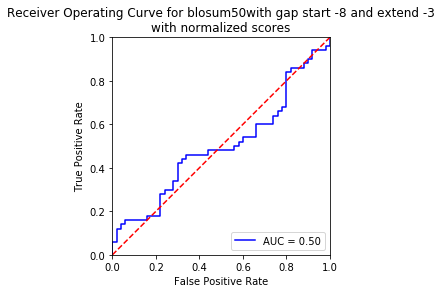

In [2]:
makeRocPlot_normScoresLC(blosum50, -8, -3, " blosum50")